In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Bibliotecas para processamento dos dados 
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import SMOTE

#Bibliotecas para previsão do modelo
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
import keras
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Activation


# Biblioteca para avaliação o modelo
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df  = pd.read_csv('../../simni/Documents/creditcard.csv')

In [4]:
df = df.drop_duplicates()

In [5]:
X = df.drop('Class', axis='columns')

In [6]:
y = df['Class']

Separando um parte para validação. 

In [7]:
X_new, X_val, y_new, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [63]:
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_new, y_new)

y_sm.value_counts()

1    226602
0    226602
Name: Class, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=1, stratify=y_sm)

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=300, class_weight = 'balanced',
                       random_state=42)

In [74]:
rfc = RandomForestClassifier()

In [75]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
rfc_yhat = rfc.predict(X_test)

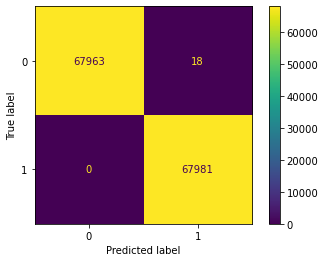

In [77]:
cm_rfc = confusion_matrix(y_test, rfc_yhat)
cm_display_rfc = ConfusionMatrixDisplay(cm_rfc).plot()

In [80]:
target_names = ['class 0', 'class 1']
rfcc =(classification_report(y_test, rfc_yhat, target_names=target_names,digits=5))
print(rfcc)

              precision    recall  f1-score   support

     class 0    1.00000   0.99974   0.99987     67981
     class 1    0.99974   1.00000   0.99987     67981

    accuracy                        0.99987    135962
   macro avg    0.99987   0.99987   0.99987    135962
weighted avg    0.99987   0.99987   0.99987    135962



In [81]:
print('F1 train:', metrics.f1_score(y_test, rfc_yhat))
print('ROCAUC score:',roc_auc_score(y_test, rfc_yhat))

F1 train: 0.999867627592293
ROCAUC score: 0.9998676100675188


# Predizendo em todos os dados. vendo tudo

In [82]:
rfc_prod = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=300, class_weight = 'balanced',
                       random_state=42)

In [83]:
rfc_prod = RandomForestClassifier()

In [85]:
rfc_prod.fit(X_sm, y_sm)

RandomForestClassifier()

In [86]:
rfc_prod_yhat = rfc.predict(X_sm)

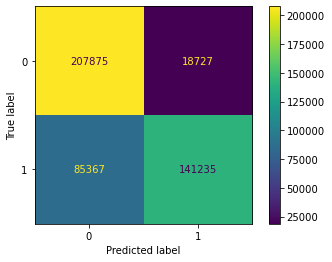

In [87]:
cm_rfc_pr = confusion_matrix(y_sm, rfc_prod_yhat)
cm_display_rfc_pr = ConfusionMatrixDisplay(cm_rfc_pr).plot()

In [99]:
rfc_prod_c =(classification_report(y_sm, rfc_prod_yhat, target_names=target_names, digits=5))
print(rfc_prod_c)

              precision    recall  f1-score   support

     class 0    0.70889   0.91736   0.79976    226602
     class 1    0.88293   0.62327   0.73072    226602

    accuracy                        0.77032    453204
   macro avg    0.79591   0.77032   0.76524    453204
weighted avg    0.79591   0.77032   0.76524    453204



In [89]:
print('F1 produção:', metrics.f1_score(y_todo_sm, rfc_prod_yhat))
print('ROCAUC produção:',roc_auc_score(y_test, rfc_yhat))

F1 produção: 0.7307198807959355
ROCAUC produção: 0.9998676100675188


# Aplicando na validação. X_val e y_val que separamos

In [90]:
scaler = StandardScaler()
scaler.fit(X_val)
X_val = scaler.transform(X_val)
X_val = scaler.transform(X_val)

In [91]:
val_rfc = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=300, class_weight = 'balanced',
                       random_state=42)

In [92]:
val_rfc = RandomForestClassifier()

In [93]:
val_rfc.fit(X_val, y_val)

RandomForestClassifier()

In [94]:
val_rfc_yhat = rfc.predict(X_val)

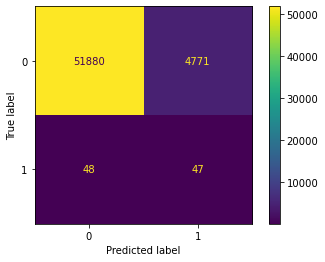

In [95]:
cm_val = confusion_matrix(y_val, val_rfc_yhat)
cm_display_val = ConfusionMatrixDisplay(cm_val).plot()

In [98]:
rfc_val =(classification_report(y_val, val_rfc_yhat, target_names=target_names, digits=5))
print(rfc_val)

              precision    recall  f1-score   support

     class 0    0.99908   0.91578   0.95562     56651
     class 1    0.00976   0.49474   0.01913        95

    accuracy                        0.91508     56746
   macro avg    0.50442   0.70526   0.48738     56746
weighted avg    0.99742   0.91508   0.95405     56746



In [97]:
print('F1 validação:', metrics.f1_score(y_val, val_rfc_yhat))
print('ROCAUC validação:',roc_auc_score(y_val, val_rfc_yhat))

F1 validação: 0.01913291268064319
ROCAUC validação: 0.7052597204118661
